# Assignment 2
## Nomin Margad-Erdene
### Long-term unemployment with random duration
Take the model of unemployment discussed in class, with $b_1>b_2$ benefits being higher for short-term unemployed. Workers are fired with probability $\mu$ each month, in which case they become short-term unemployed, eligible for benefit $b_1$.

This higher benefit is not until a fixed period. Rather, unemployed lose their eligibility with probability $\tau$ each month. After losing their benefit, they receive $b_2$ each month until they find a job. (There is no way to go back to the higher benefit.)

Search technology is such that with $e$ effort the person finds a job with probability $1-\exp(-\lambda e)$ for $\lambda>0$. Efforts incur a linear disutility, that is, an unemployed with benefit $b$ exerting search effort $e$ receives per-period utility $b-e$.

### 1. What are the states in this problem? Write down the transition matrix for this Markov chain.

I will use $b_2$ for benefits of short term unemployed and $b_3$ for benefits of long term unemployed. This makes it less confusing given my states.

$b_2 > b_3$

$S_1$: employed with $w$

$S_2$: short term unemployed with $b_2$

$S_3$: long term unemployed with $b_3$

Probability of finding a job is the probability we transition $S_2 \to S_1$ or $S_3 \to S_1$. Therefore: $P_{21} = 1 - e^{-\lambda e_2}$ and $P_{31} = 1 - e^{-\lambda e_3}$

Transition matrix is:
$$
P =
\begin{pmatrix}
P_{11} & P_{12} &P_{13}\\
P_{21} & P_{22} &P_{23}\\
P_{31} & P_{32} &P_{33}
\end{pmatrix}
=
\begin{pmatrix}
1-\mu & \mu & 0\\
1 - e^{-\lambda e_2} & e^{-\lambda e_2} - \tau & \tau\\
1 - e^{-\lambda e_3} & 0 & e^{-\lambda e_3}
\end{pmatrix}
$$

For the transition matrix to be a "proper" one, all elements should be between zero and one. While others do, $P_{22}$ does not satisfy this requirement by construction because effort is endogenous. Therefore, I include this constraint (in my function):

$$
e^{-\lambda e_2} - \tau \geq 0\\
e^{-\lambda e_2} \geq \tau\\
\lambda e_2 \geq ln(\tau)\\
e_2 \leq - \frac{ln(\tau)}{\lambda}
$$

and

$$
e^{-\lambda e_2} - \tau \leq 1\\
e_2 \geq - \frac{ln(1+\tau)}{\lambda}
$$
(since we already have imposed that effort cannot be 0, and $-ln(1+\tau)<0$ for any $\tau>0$, this constraint is not binding for any $\lambda$>0)



### 2. Write down the Bellman equation for each of the states. Interpret the economic meanings of each term.

If we define $\mathbf{u} = 
\begin{pmatrix} 
w \\
b_2 - e_2\\
b_3 - e_3
\end{pmatrix}$ and $\mathbf{V} = \begin{pmatrix} 
V_1\\
V_2\\
V_3
\end{pmatrix}$ we get: 
$$
\mathbf{V} = \max_{e_2, e_3} \mathbf{u}(e_2, e_3) + \beta(\mathbf{P}(e_2, e_3) \mathbf{V})
$$,
where the workers can change their transition probabilities and flow utility by searching more/less. 
Value function is vector of these 3 values:

#### For employed:
$$
V_1 = w + \beta \big( (1-\mu)V_1 + \mu V_2 \big)
$$
If a worker is employed, he gets the flow benefit of wage, and with $\beta$ discount factor he can remain employed with probability $(1-\mu)$ or with complemetary probability $\mu$ transitions to short term unemployment and his value becomes $V_2$. Employed workers do not incur a search cost, and cannot transition directly to long term unemployment. 

#### For short term unemployed:
$$
V_2 = \max_{e_2} b_2 - e_2 + \beta \big( (1-e^{-\lambda e_2})V_1 + (e^{-\lambda e_2} - \tau) V_2 + \tau V_3 \big) 
$$
If a worker is short term unemployed, he gets $b_2$ (the higher benefit) as flow benefit but incurs cost of searching $e_2$. With discount $\beta$, and with probability:
* $1-e^{-\lambda e_2}$ he transitions to employment and his value becomes $V_1$
* $\tau$ he loses his high benefit and transitions to long term unemployment, thus getting value $V_3$
* $1 - \tau - (1 - e^{-\lambda e_2}) = e^{-\lambda e_2} - \tau$ he stays in short term unemployment, with value $V_2$

#### For long term unemployed:
$$
V_3 = \max_{e_3} b_3 - e_3 + \beta \big( (1-e^{-\lambda e_3})V_1 + (e^{-\lambda e_3} V_3 \big) 
$$
If a worker is long term unemployed, he gets $b_3$ (lower benefit) and incurs search cost $e_3$. With discount $\beta$ and with probability $1- e^{-\lambda e_3}$ he becomes employed with value $V_1$ or with complementary probability $e^{-\lambda e_3}$ he stays in long term unemployment with value $V_3$. Long term unemployed workers cannot transition back to short term unemployment. 



### 3. Show that unemployed who have already lost their eligibility for higher benefits search harder.

In this problem if benefits are the same, then efforts are the same.
If $b_2 > b_3$, long term unemployed search more because $(V_3)$ is lower than short term ($V_2$) due to flow benefits, and that results in bigger gap between values of current state and employment. Long term unemployed get more value from transitioning to employment. This results in more intense search effort. 

In more detail below:

F.O.C for $V_2$:
$$
-1 + \beta \big( V_1  \lambda e^{-\lambda e_2} - \lambda V_2 e^{-\lambda e_2} \big) = 0
$$
$$
 e^{-\lambda e_2} = \frac{1}{(V_1 - V_2)\lambda \beta}\\
$$
$$
e_2 = \frac{1}{\lambda} \big( ln(\beta) + ln(\lambda) + ln(V_1 - V_2) \big)
\tag{*}
$$
F.O.C for $V_3$:
$$
-1 + \beta \big( V_1  \lambda e^{-\lambda e_3} - \lambda V_3 e^{-\lambda e_3} \big)= 0\\
e^{-\lambda e_3} = \frac{1}{(V_1 - V_3) \lambda \beta}
$$
$$
e_3 = \frac{1}{\lambda} \big( ln(\beta) + ln(\lambda) + ln(V_1 - V_3) \big)
\tag{**}
$$

We see that the effort depends on the difference between value of being employed and value of being unemployed. Then we will be sure that $e_3 > e_2$ if we can be sure $V_2 > V_3$.

Substituting $e^{-\lambda e_i}$ into the expected future value, we get:

$$
V_2 = b_2 - e_2 + \beta \big( V_1 - \frac{V_1}{(V_1 - V_2) \beta \lambda} + \frac{V_2}{(V_1 - V_2) \beta \lambda} - \tau V_2 + \tau V_3 \big)
$$
$$
V_2 = b_2 - e_2 + \beta \big( V_1 - \frac{1}{\beta \lambda} \big) - \beta \tau (V_2 - V_3)
\tag{***}
$$
$$
V_3 = b_3 - e_3 + \beta \big( V_1 - \frac{1}{\beta \lambda} \big)
\tag{****}
$$

We can see that, in the optimum, the expected future values do not depend on effort. For long term unemployed, the expected future value only depends on the expected value of being employed. For short term unemployed, there is an additional term $\beta \tau (V_2 - V_3)$ which indicates that his expected future value depends on value of being employed minus change in value he incurs from losing the high benefit multiplied by probability of losing it $\tau$ and discount factor. 

Taking equations $(*) \to (****)$ into account, I can state now that: 
* if $b_2 = b_3$: 

$e_2 = e_3$ and $V_2 = V_3$

If the flow benefits of 2 unemployed states equal, the values of the state in optimum also become equal. The additional term 
$\beta \tau (V_2 - V_3)$ in equation $(***)$ disappears and equations are satisfied with $e_2 = e_3$.

* if $b_2 > b_3$: 

$e_2 < e_3$ and $V_2 > V_3$


With higher flow benefits, the current and expected future values of being short term unemployed is higher than long term. $(V_2 > V_3)$. Then the last term in equation $(***)$: $\beta \tau (V_2 - V_3) > 0$ is not zero  (it is worker's loss in value from losing benefit).The equation equates back only with lower $e_2$. 


#### Proof by Julia: 
Given the optimal policy, we can solve the value of being in each state,
$$
\mathbf V = (\mathbf I - \beta \mathbf P) ^{-1} \mathbf u.
$$
The function $\mathbf{policy}$ computes value from given policy and uses those values to update the policy, and iterates it until we converge

In [1]:
using Plots
using LinearAlgebra

In [2]:
function policy(effort::Vector{Float64}, params)
    w = params.w
    b2 = params.b2
    b3 = params.b3
    β = params.β
    λ = params.λ
    μ = params.μ
    τ = params.τ
    
    u = zeros(3)
    M = zeros(3,3)
    V = zeros(3)
    for k = 1:155
        prob2 = 1- exp(-λ*effort[2])
        prob3 = 1-exp(-λ*effort[3])
        u = [w; b2 - effort[2]; b3-effort[3]]
        p = [1-μ μ 0; prob2 1-τ-prob2 τ; prob3 0 1-prob3]
        V = (I(size(p, 1)) - β.*p) \ u
        M = inv(I(size(p, 1)) - β.*p)
        effort_new = similar(effort)
        effort_new[1] = 0.0
        effort_new[2] = max(0, 1/λ*(log(β) + log(λ) + log(V[1] - V[2])))
        effort_new[3] = max(0, 1/λ*(log(β) + log(λ) + log(V[1] - V[3])))
        effort = effort_new
    end
    return M, effort, V, u
end

policy (generic function with 1 method)

If we take inputs $b_2 = b_3$, then $ \mathbf{M} = (\mathbf I - \beta \mathbf P) ^{-1}$, efforts and values are:

In [3]:
effort = zeros(3)
params = (w=1.0, b2=0.4, b3=0.4, β=0.995, λ=0.03, μ=0.01, τ=0.15)
M, effort, V, u = policy(effort, params)
[M effort V]

3×5 Array{Float64,2}:
 173.596   8.04634  18.3581  0.0      129.024
 160.327  12.0897   27.5833  2.08804   93.3572
 160.327   7.43133  32.2417  2.08804   93.3572

We see that if benefits are equal, $e_2 = e_2 = 2.09$ and $V_2 = V_3 = 93.35$

Then, if we take inputs $b_2 > b_3$, the $ \mathbf{M} = (\mathbf I - \beta \mathbf P) ^{-1}$, efforts and values are:

In [4]:
effort = zeros(3)
params = (w=1.0, b2=0.6, b3=0.2, β=0.995, λ=0.03, μ=0.01, τ=0.15)
M, effort, V, u = policy(effort, params)
[M effort V]

3×5 Array{Float64,2}:
 181.968   7.95389  10.0786  0.0      128.025
 172.906  11.9508   15.1432  2.55381   91.8566
 174.243   7.61625  18.1407  4.01027   90.2412

Now, $e_3 > e_2$: worker searches harder because $V_3 < V_2$, which means the increase in value he can get from getting job is higher for "long term" unemployment state.

### 4. Numerically compute the solution of the model (value and policy, also job-finding probability) for $\mu=0.01$, $\lambda=0.03$, $\tau=0.15$ and $\beta=0.995$. You can use either value function iteration or policy function iteration.

function value_interate is value function iteration:

In [5]:
function value_iterate(V::Array{Float64,1}, params)
    #parameters
    w = params.w
    b2 = params.b2
    b3 = params.b3
    β = params.β
    λ = params.λ
    μ = params.μ
    τ = params.τ
    #defining vectors and matrix
    v = similar(V)
    u = similar(V)
    effort = similar(V)
    p = zeros(3,3)
    #solving for efforts
    #efforts get updated based on input V
    effort[1] = 0.0
    #imposing condition that effort[2] cannot be larger than -log(τ). The other requirement is satisfied by imposing 0
    effort[2] = min(-log(τ)/λ, max(0, 1/λ*(log(β) + log(λ) + log(V[1] - V[2]))))
    effort[3] = max(0, 1/λ*(log(β) + log(λ) + log(V[1] - V[3])))
    #defining transition probabilities
    prob2 = 1-exp(-λ*effort[2])
    prob3 = 1-exp(-λ*effort[3])
    #flow of utility: gets updated based on optimal effort
    u = [w; b2 - effort[2]; b3-effort[3]]
    #transition matrix: gets updated based on optimal effort
    p = [1-μ μ 0; prob2 1-τ-prob2 τ; prob3 0 1-prob3]
    #solve for new v
    v = u + β.*(p*V)
    return v, effort
end

value_iterate (generic function with 1 method)

In [6]:
params = (w=1.0, b2=0.6, b3=0.2, β=0.995, λ=0.03, μ=0.01, τ=0.15)
V = zeros(3)
effort = zeros(3)
tolerance = 1e-12
distance = 1e+12
k = 1
v_vector = zeros(100000,3)
e_vector = zeros(100000,2)
for k = 1:100000
    v, effort = value_iterate(V, params)
    v_vector[k,:] = v
    e_vector[k,:] = effort[2:3]
    distance = maximum(abs.(v .- V))
    V = v
    if distance < tolerance
        println(k)
        break    
    end
end
println(V)
println(1 .- exp.(-params.λ*effort))
println(effort)

5401
[128.02495881888797, 91.85659641641887, 90.24123126236776]
[0.0, 0.07375299030262317, 0.11335276619215129]
[0.0, 2.5538110257981916, 4.010269429091433]


We get: 
$$
V_1 = 128.02, V_2 = 91.85, V_3 = 90.24
$$
$$
e_1 = 0, e_2 = 2.55, e_3 = 4.01
$$
$$
P_{11} = 0, P_{21} = 0.07, P_{31} = 0.11
$$

Iterating the policy function (calling from cell above), we get same numeric results:

In [7]:
effort = zeros(3)
params = (w=1.0, b2=0.6, b3=0.2, β=0.995, λ=0.03, μ=0.01, τ=0.15)
M, effort, V, u = policy(effort, params)
[V effort]

3×2 Array{Float64,2}:
 128.025   0.0
  91.8566  2.55381
  90.2412  4.01027

#### Here I plot the paths of values and efforts:

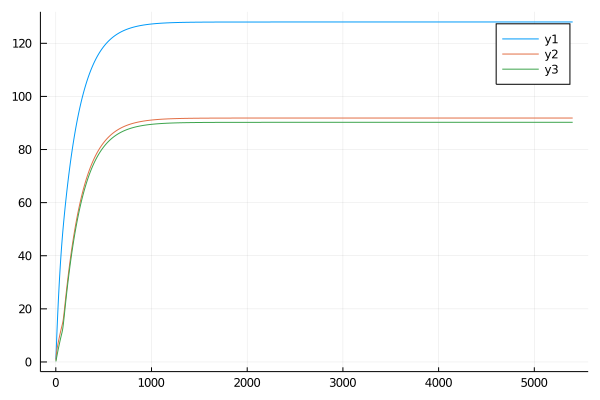

In [8]:
plot(v_vector[1:5401,:])

We can observe that with $b_2 = 0.6$ and $b_3 = 0.2$, it is always the case that $e_3 > e_2$ 

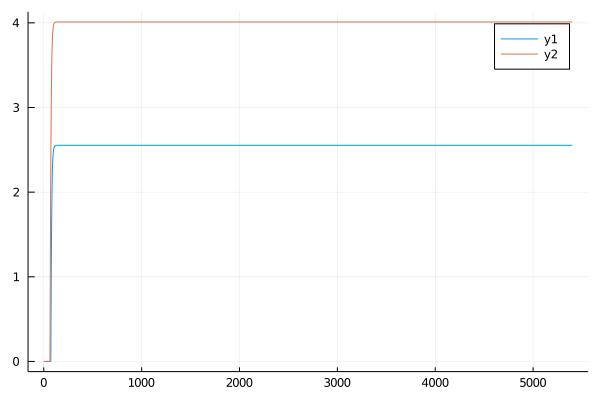

In [9]:
plot(e_vector[1:5401,:])